# SVM-Loading and Examining our dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
original_data = pd.read_csv(
     "data/adult.csv",
      names=[
          "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
          "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
          "Hours per week", "Country", "Target"],
      sep=r'\s*,\s*',
      engine='python',
      na_values="?")

In [8]:
original_data

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#extra
print(original_data.dtypes["Age"])

int64


In [10]:
#extra
print(original_data.dtypes["Education"])

object


In [43]:
# DataFrame.value_counts(): It returns a series containing counts of unique rows in the DataFrame

In [11]:
original_data["Education"].value_counts()# returns a series of the count of unique rows in the Dataframe

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

<AxesSubplot:>

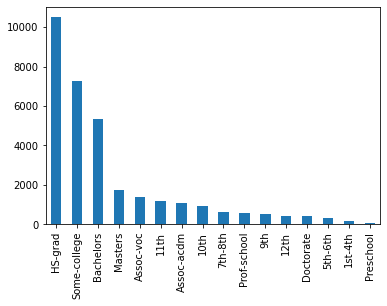

In [12]:
#extra
original_data["Education"].value_counts().plot(kind="bar")

In [13]:
#extra
import math
cols=3
print(original_data.shape[1])
rows=math.ceil(float(original_data.shape[1])/cols)
print(rows)

15
5


C:\Users\WIN7\AppData\Local\Temp/ipykernel_4704/3558488780.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] == np.object:
C:\Users\WIN7\AppData\Local\Temp/ipykernel_4704/3558488780.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] == np.object:
C:\Users\WIN7\AppData\Local\Temp/ipykernel_4704/3558488780.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this 

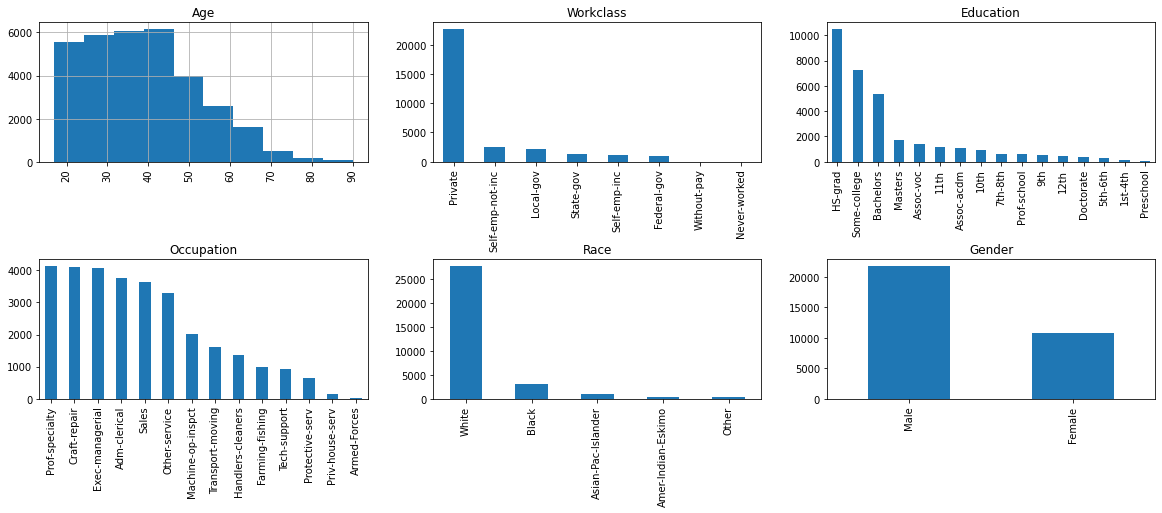

In [14]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [15]:
# Use LabelEncoder to transform text to numbers
import sklearn.preprocessing as preprocessing

le= preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [17]:
original_data['Target'].unique()

array([0, 1])

In [18]:
original_data.Target.unique()

array([0, 1])

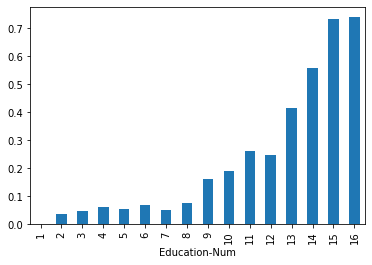

In [19]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

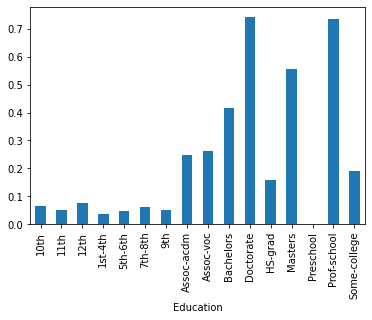

In [20]:
original_data.groupby('Education').Target.mean().plot(kind='bar')
plt.show()

# SVM-Building and Tweaking our SVM classification mode

In [21]:
#Building a machine learning model
#train_test_split is used to split our dataset into subsets
#one will be used to train and build the model
#other one will be used to test its accuracy

from sklearn.model_selection import train_test_split

#defining our x variables
#Taking only the (two) features that are important for now
x = original_data[['Education-Num','Occupation']] #Number of years of education & occupation of person

#y variable is the target field
y = original_data['Target']

# Getting the training and test data by using train_test_split method
# Splitting dataset into 80%  for training set and 20% for testing set so that we can see our accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# by specifying our value for random state=0, we suppose to say that even if we were to rerun the cell the training and test
# data will be split exactly the same way and not randomly

In [22]:
x_train

,Education-Num,Occupation
15282,7,13
24870,9,3
18822,13,0
26404,9,11
7842,11,9
...,...,...
13123,14,3
19648,6,4
9845,10,11
10799,16,3


In [23]:
x_test

,Education-Num,Occupation
22278,10,0
8950,13,9
7838,12,11
16505,3,13
19140,7,13
...,...,...
7694,10,3
10410,7,2
1043,13,3
30860,9,6


In [24]:
y_train

15282    0
24870    0
18822    0
26404    0
7842     0
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: Target, Length: 26048, dtype: int32

In [25]:
y_test

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
7694     1
10410    0
1043     1
30860    0
12467    1
Name: Target, Length: 6513, dtype: int32

In [26]:
# importing the svm classifier from Scikit learn library
# There are a number of SVM classiiers available
# We are using SVC: C-Support Vector Classification
from sklearn.svm import SVC

# Declaring the SVC model with no tuning(i.e without specifying any parameters for now)
classifier = SVC()

# Next step is to train the model by using the fit method
# [Fitting the data. This is where the SVM will learn]
classifier.fit(x_train, y_train)

# Predicting the result and giving the accuracy of model using score method
score = classifier.score(x_test, y_test) #we will pass here the test_data
# the x variables from the test data will be passed on to the classifier
# The model will then make pediction and these predictions are check against y_values in test & a score for accuracy is calculated

# Printing the score model received on the tests
print(score)

0.7861200675571933


In [27]:
# Here we get an accuracy score which is nearly 79% in this case
# For a model to take wild guesses, we expect the accuracy to be closer to 50%

# 79% is a good score
# Lets see if we could get score above 79% mark

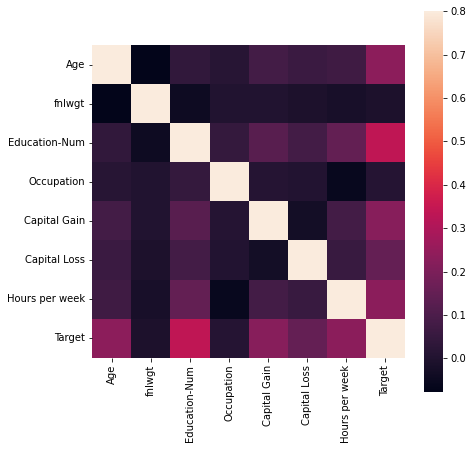

In [28]:
# We will import one more library  named 'seaborn' for higher accuracy
# We will construct a 'Correlation matrix' that will help us visualise how all the fields in the dataset are correlated
# It will also help in identifying which of the fields are correlated with target the feild
import seaborn as sns

corrmat = original_data.corr() #Specifying the data to be used from dataframe
f, ax = plt.subplots(figsize=(7,7)) #specifying the size of the matrix
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
# Only fields with numeric values will show up in correlation matrix

In [29]:
# we can see each field is strongly correlated with itself which is quite understandable
# Lighter colours tend to show a strong correlation
# The number of educatio years ['Education-Num'] is strongly correlated with the target
# 'Capital Gain' and 'Capital Loss' fields are also strongly correlted
# All the non-numeric fields from our datadet are not displayed in this correlation matrix

In [30]:
# Convert potential relevant non-numeric fields to have numeric values via label encoders
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,9,13,4,0,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,9,13,2,3,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,11,9,0,5,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,1,7,2,5,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,9,13,2,9,Wife,2,0,0,0,40,Cuba,0


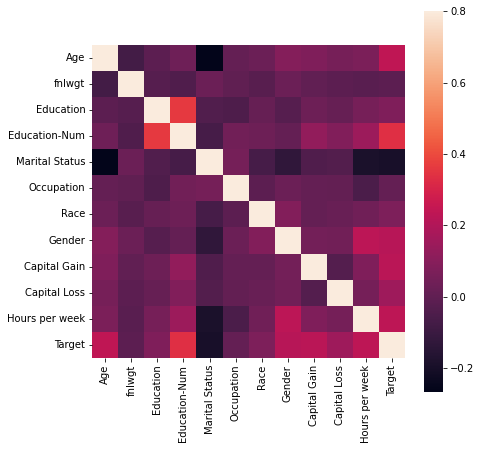

In [31]:
# Recreating the correlation matrix
corrmat = original_data.corr() #Specifying the data to be used from dataframe
f, ax = plt.subplots(figsize=(7,7)) #specifying the size of the matrix
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

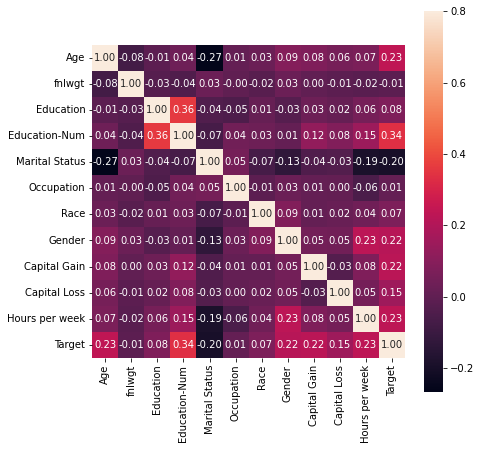

In [32]:
# The above heatmap contains the newly transformed fields as well

# To view the correlations values as numbers rather than just colour representation
# By recreating our correlational matrix we will specify some different parameters here
# annot= True: To specify the annotations
# fmt='.2f': specifying the format for annotation values
corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot= True, fmt='.2f');
plt.show()

In [33]:
# we have numeric values for correlations in the new heatmap
# Education num and Educattion feilds have pretty strong correaltion
# we need to decide which one needs to be used in the model
# The Age of the person also seems to be correlated with the Target value

In [34]:
# While building the next model a new feature 'Age' of the person can be added to check the improvement in performance of model against test data
# Resetting features
x = original_data[['Education-Num','Occupation', 'Age']]
y = original_data['Target']
# splitting the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Training the dataset
classifier = SVC()

classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test) 
print(score)

0.7858129894058038


In [35]:
# This time we still get accuracy under 79%
# lets add a new field 'Gender'

x = original_data[['Education-Num','Occupation', 'Age', 'Gender']]
y = original_data['Target']
# splitting the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Training the dataset
classifier = SVC()

classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test) 
print(score)

0.7953324120988792


In [36]:
# This time we get an accuarcy above 79%, earlier it was under 79%
# so we are improving

In [37]:
# Lets play around a little bit with this reasonable classifier
# Earlier this classifier was built without any parameters specified i.e. no tuning was involved
# We will recreate it by specifying a kernel function type this time
# kernel = 'rbf' : radial basis function
# Specifying a C value (C=1.0) which is a penality parameter(will be discussed in detail in overfitting module)

classifier = SVC(kernel='rbf', C=1.0)

classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test) 
print(score)

0.7953324120988792


In [38]:
# We get the accuracy score exactly the same as the old model
# This is because the kernel type of 'rbf' and C value of 1.0 are the default values for the SVC classifier 

In [39]:
# Lets do some tweaking(make small changes)

# Adjust the penality parameter (C=10.0)

classifier = SVC(kernel='rbf', C=10.0)

classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test) 
print(score)

0.7968678028558268


In [40]:
# We can see the accuracy score had increased a little
# Hyperparameter Tuning: Tweaking the parameters of our model until there is satisfaction with its accuarcy

In [41]:
# Lets now try a linear kernel
classifier = SVC(kernel='linear', C=1.0)

classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test) 
print(score)

0.796714263780132


In [42]:
# And we see the accuracy isnt that much different